In [1]:
%matplotlib inline  

In [2]:
import pandas as pd

NRcan provides a nice bash script that works very well on linux, but I need to read the downloaded csv files into a dataframe.

In [3]:
#eng-hourly-07012012-07312012.csv (example)
file_template="eng-hourly-{month}{day_ini}{year}-{month}{day_end}{year}.csv"

create strings with the name code using by NRCAN, to load them by their name

In [4]:
r_end=pd.date_range(start='1/1/2008',end='12/31/2015',freq='M').strftime("%m%d%Y")

In [5]:
r_beg=pd.date_range('1/01/2008',end='12/01/2015',freq='MS').strftime("%m%d%Y")

loop the two ranges of dates simultaneously to generate the desired names

In [6]:
names=[]
for dates_ini,dates_end in zip(r_beg,r_end):    
    #print ("eng-hourly-"+dates_ini+"-"+dates_end+".csv")
    names.append("eng-hourly-"+dates_ini+"-"+dates_end+".csv")

here we load each csv and append it to a big dataframe. It may be possible to append the csv without passing by a dataframe structure and then load a single big csv. appending dataframes on a loop is in general a bad idea if we are worried about the time it takes.

In [11]:
mont1 = pd.DataFrame()
for files in names:
    files='bash/5415/'+files
    mont1=mont1.append(pd.read_csv(files, skiprows=16, index_col='Date/Time', parse_dates=True))

Checking null values

In [13]:
mont1.head()

,Year,Month,Day,Time,Data Quality,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,2008,1,1,00:00,,-4.6,NaN,-6.0,NaN,90.0,...,NaN,19.3,NaN,101.30,NaN,NaN,NaN,-7.0,NaN,Mainly Clear
2008-01-01 01:00:00,2008,1,1,01:00,,-6.9,NaN,-7.9,NaN,93.0,...,NaN,19.3,NaN,101.37,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
2008-01-01 02:00:00,2008,1,1,02:00,,-6.2,NaN,-7.2,NaN,93.0,...,NaN,16.1,NaN,101.40,NaN,NaN,NaN,NaN,NaN,Cloudy
2008-01-01 03:00:00,2008,1,1,03:00,,-4.6,NaN,-5.8,NaN,91.0,...,NaN,19.3,NaN,101.41,NaN,NaN,NaN,-6.0,NaN,Cloudy
2008-01-01 04:00:00,2008,1,1,04:00,,-4.1,NaN,-5.4,NaN,91.0,...,NaN,19.3,NaN,101.40,NaN,NaN,NaN,NaN,NaN,Cloudy


In [14]:
for year in range(2008,2015):
    print ((year,'has', mont1[str(year)]['Temp (°C)'].isnull().sum(), "null values"))


(2008, 'has', 0, 'null values')
(2009, 'has', 3, 'null values')
(2010, 'has', 3, 'null values')
(2011, 'has', 1, 'null values')
(2012, 'has', 0, 'null values')
(2013, 'has', 7691, 'null values')
(2014, 'has', 8760, 'null values')


In [15]:
#mont1.to_csv('montreal_hourly_weather2008_2012.csv')

## load data from 2013 onwards from another station (it changed)

In [16]:
r_end=pd.date_range(start='1/1/2013',end='12/31/2015',freq='M').strftime("%m%d%Y")
r_beg=pd.date_range('1/01/2013',end='12/01/2015',freq='MS').strftime("%m%d%Y")
# loop two the two ranges of dates simultaneously to generate the desired names
names=[]
for dates_ini,dates_end in zip(r_beg,r_end):    
    #print ("eng-hourly-"+dates_ini+"-"+dates_end+".csv")
    names.append("eng-hourly-"+dates_ini+"-"+dates_end+".csv")

In [17]:
mont2 = pd.DataFrame()
for files in names:
    files='bash/51157/'+files
    mont2=mont2.append(pd.read_csv(files, skiprows=16, index_col='Date/Time', parse_dates=True))

In [18]:
for year in range(2013,2016):
    print ((year,'has', mont2[str(year)]['Temp (°C)'].isnull().sum(), "null values"))

(2013, 'has', 1055, 'null values')
(2014, 'has', 3, 'null values')
(2015, 'has', 8, 'null values')


In [19]:
#mont2.to_csv('montreal_hourly_weather2013_2015.csv')

from march 2013 onwards the data comes from a different weather station (also located at the airport)

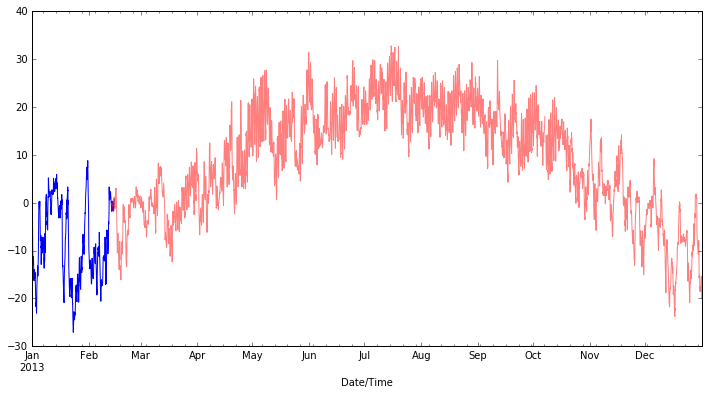

In [22]:
mont1['2013']['Temp (°C)'].plot(figsize=[12,6])
mont2['2013']['Temp (°C)'].plot(figsize=[12,6],color='r',alpha=0.5)

it's quite good, the chunk of 2013 missing in the second station is in the first one. Otherwise, very few missing values.

In [83]:
weather_mont=pd.concat([mont1,mont2])

Eliminating some duplicated elements in the index

In [84]:
len(weather_mont.loc[weather_mont.index.duplicated()])

27

In [85]:
weather_mont=weather_mont[~weather_mont.index.duplicated(keep='first')]

In [86]:
len(weather_mont.loc[weather_mont.index.duplicated()])

0

Temperature looks good

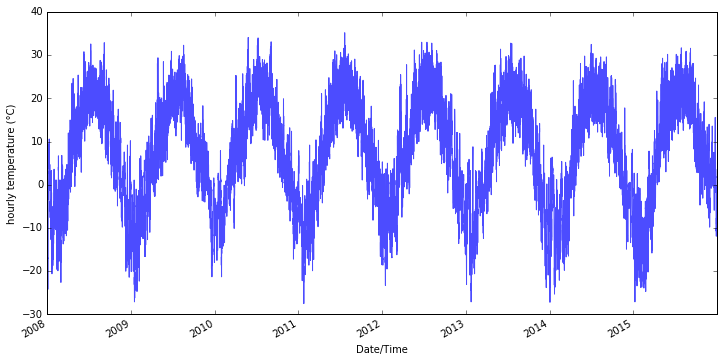

In [138]:
a=weather_mont['Temp (°C)'].plot(figsize=[12,6])
a.set_ylabel('hourly temperature (°C)')

In [88]:
weather_mont.to_csv('weather_montreal_2008_2015.csv')

### Calculate "heating degree hours" and "heating degree days"

In [89]:
weather_mont['HDH']=weather_mont['Temp (°C)'].apply(lambda x: 18-x if x<18 else 0)

In [90]:
weather_mont['HDD']=weather_mont['HDH'].resample('D').transform('sum')

In [92]:
weather_mont['HDD'].mean()/weather_mont['HDD'].max()

0.26404042602881106

In [93]:
weather_mont['HDH'].mean()/weather_mont['HDH'].max()

0.24972788884225838

the hourly data gives a more extreme value. makes sense, daily averaging smooths some of the temperature peaks.  if we use monthly values the availability factor increases a lot, because we underestimate the peak need.

## alternative method using the number of equivalent hours

An alternative method to calculate the availability factor consist in estimate the *number of equivalent full-load hours*, as defined by Papakostas et al 2009 (doi:10.1016/j.apenergy.2008.10.017).  

https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

\begin{equation*}
N_{eq} = \frac{\sum_1^m N_{bin,i}\cdot (T_{bal}-T_{o,i})}{(T_{bal}-T_{ODH})}
\end{equation*}

where $N_{eq}$ are the number of equivalent full hours, $N_{bin,i}$ is the number of hours within the bin i, $T_{o,i}$ is the outside temperature in the bin i, $T_{bal}$ is the balance temperature and $T_{ODH}$ is the outdoor design temperature of the heating period.

The total of full-load equivalent hours in a period divided by the number of hours in a period gives an estimator of the availability factor.

For ilustrating purposes we can have a look to the histogram of temperature data between 2008 and 2009

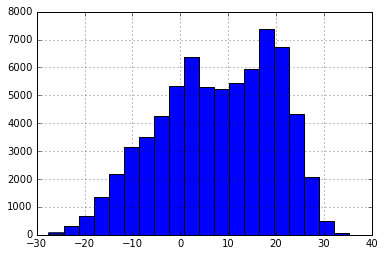

In [94]:
weather_mont['Temp (°C)'].hist(bins=20)

In [71]:
weather_mont['Temp (°C)'].min()

-27.5

Create the bins

In [95]:
bins2=list(range(-28,20,2))

In [111]:
temp_mont=weather_mont[['Temp (°C)']]

In [114]:
temp_mont.head()

,Temp (°C),HDH
Date/Time,,
2008-01-01 00:00:00,-4.6,22.6
2008-01-01 01:00:00,-6.9,24.9
2008-01-01 02:00:00,-6.2,24.2
2008-01-01 03:00:00,-4.6,22.6
2008-01-01 04:00:00,-4.1,22.1


In [140]:
#temp_mont['HDH']=temp_mont['Temp (°C)'].apply(lambda x: 18-x if x<18 else 0)

In [115]:
temp_mont['Temp (°C)'].min()

-27.5

In [116]:
temp_mont['bin']=pd.cut(temp_mont['Temp (°C)'],bins2,precision=1)

C:\Users\Maik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
binned=temp_mont[['Temp (°C)','bin']].groupby('bin').agg(['mean','count'])

better to specify the bins so we have a "cut" at 18C, the balance temperature

In [124]:
binned

Temp (°C)      
                 mean count
bin                        
(-28, -26] -26.754839    31
(-26, -24] -24.848276    58
(-24, -22] -22.855838   197
(-22, -20] -20.895862   290
(-20, -18] -18.844294   517
(-18, -16] -16.881321   787
(-16, -14] -14.905329  1126
(-14, -12] -12.908339  1463
(-12, -10] -10.935381  1823
(-10, -8]   -8.936443  2176
(-8, -6]    -6.972739  2256
(-6, -4]    -4.921041  2652
(-4, -2]    -2.979503  2698
(-2, 0]     -0.904346  3221
(0, 2]       1.045643  4441
(2, 4]       3.043448  3793
(4, 6]       5.067228  3326
(6, 8]       7.060487  3447
(8, 10]      9.066730  3183
(10, 12]    11.076110  3537
(12, 14]    13.062967  3451
(14, 16]    15.065542  3973
(16, 18]    17.047920  4374

In [133]:
Neqh=(binned['Temp (°C)','count']*(18-binned['Temp (°C)','mean'])/(18--27.5)).sum()

In [134]:
Neqh/len(temp_mont)

0.24972788884225894